<a href="https://colab.research.google.com/github/Niyati3011/Breast-Cancer-Prediction-using-ML/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns

In [4]:
#downloading dataset
import os
os.environ['KAGGLE_USERNAME']='koalasworld'
os.environ['KAGGLE_KEY']='08591c15351f0435e4ca72acccb823fd'
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0


In [5]:
#unzipping File
!unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


Load and Explore data

In [6]:
#load data in dataframe
df=pd.read_csv('/content/data.csv')

In [7]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#count of ros and columns
df.shape

(569, 33)

In [9]:
#count of null values
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
#drop columns with null values
df.dropna(axis=1,inplace=True)


In [11]:
#count of rows and colums
df.shape

(569, 32)

In [12]:
#get count of M and B cells in diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [13]:
#get datatypes of each column in our datatype
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)


In [17]:
#display df
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
#split data in dependent and independent variables
X=df.iloc[:,2:].values
Y=df.iloc[:,1].values

In [43]:
#splitting dataset into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [21]:
#print data
X_train

array([[1.453e+01, 1.398e+01, 9.386e+01, ..., 1.069e-01, 2.606e-01,
        7.810e-02],
       [1.143e+01, 1.731e+01, 7.366e+01, ..., 6.402e-02, 2.584e-01,
        8.096e-02],
       [1.320e+01, 1.582e+01, 8.407e+01, ..., 2.500e-02, 2.651e-01,
        8.385e-02],
       ...,
       [1.190e+01, 1.465e+01, 7.811e+01, ..., 6.042e-02, 2.727e-01,
        1.036e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02],
       [1.377e+01, 2.229e+01, 9.063e+01, ..., 1.673e-01, 3.080e-01,
        9.333e-02]])

In [47]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)
classifier.fit(X_train,Y_train)
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
#make use of trained model to make prediction on test data
predictions=classifier.predict(X_test)

[[89  0]
 [ 4 50]]


<Axes: >

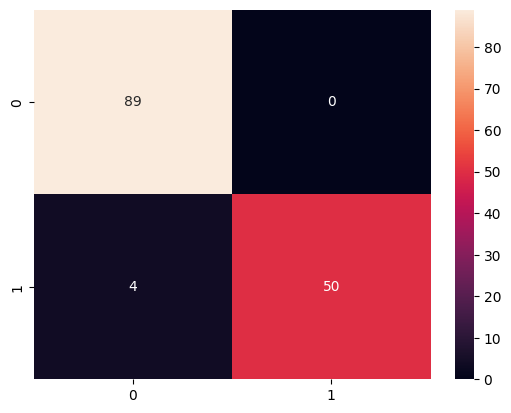

In [49]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(Y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [51]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.972027972027972


In [52]:
print(Y_test)

[0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1
 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [53]:
print(predictions)

[0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1
 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [60]:
#  STEP 1: Import all the tools we need
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd


#  STEP 2: Load your dataset
# Replace this with your real data loading line
# Example if it's in a CSV file:
df = pd.read_csv('/content/data.csv')

#  STEP 3: Separate features (X) and labels (Y)
X = df.drop("diagnosis", axis=1)   # 'target' should be the column with 0 (benign) and 1 (malignant)
Y = df["diagnosis"]

imputer = SimpleImputer(strategy='mean')  # Replace missing values with the column mean
X = imputer.fit_transform(X)

#  STEP 4: Split into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

#  STEP 5: Scale the feature values so they're all on the same level
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Learn from training data and transform
X_test = scaler.transform(X_test)        # Use same scaling on test data

#  STEP 6: Set up the logistic regression model with class balancing
model = LogisticRegression(class_weight='balanced', max_iter=1000)

#  STEP 7: Try out different settings (hyperparameters) to find the best one
params = {
    'C': [0.01, 0.1, 1, 10, 100],               # Model sensitivity
    'solver': ['liblinear', 'lbfgs', 'saga']    # Math methods
}

#  STEP 8: Use GridSearch to test all combinations and find the best
grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, Y_train)

#  STEP 9: Use the best version of the model found by GridSearch
best_model = grid.best_estimator_

#  STEP 10: Test how good the model is on new (test) data
Y_pred = best_model.predict(X_test)

print(" Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\n Classification Report:")
print(classification_report(Y_test, Y_pred))

print("\n ROC AUC Score:")
print(roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1]))

#  STEP 11: Cross-validation (extra practice!)
scores = cross_val_score(best_model, X_train, Y_train, cv=5)
print("\n Cross-validated accuracy:", scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_mode

 Confusion Matrix:
[[72  0]
 [ 1 41]]

 Classification Report:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        72
           M       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


 ROC AUC Score:
0.9976851851851852

 Cross-validated accuracy: 0.9736263736263737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
